In [1]:
import pandas as pd 

In [2]:
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [3]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [4]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [5]:
ev_data =ev_data.dropna()

# EV Adoption Over Time by visualizing the number of EVs registered by model year

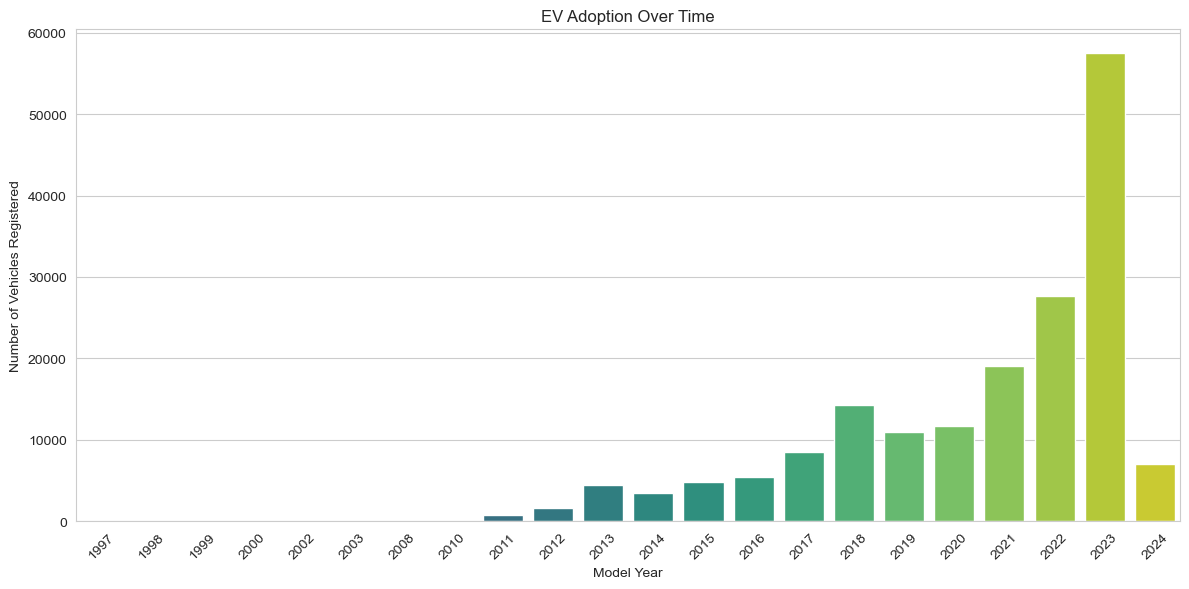

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# EV Adoption Over Time
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:


In [9]:
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

In [12]:
top_counties

Index(['King', 'Snohomish', 'Pierce'], dtype='object')

In [13]:
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

In [14]:
top_counties_data

VIN (1-10)     County           City State  Postal Code  Model Year  \
0       5YJYGDEE1L       King        Seattle    WA      98122.0        2020   
1       7SAYGDEE9P  Snohomish        Bothell    WA      98021.0        2023   
2       5YJSA1E4XK       King        Seattle    WA      98109.0        2019   
3       5YJSA1E27G       King       Issaquah    WA      98027.0        2016   
7       KNAGV4LD9J  Snohomish        Bothell    WA      98012.0        2018   
...            ...        ...            ...   ...          ...         ...   
177858  5YJ3E1EB8N  Snohomish      Snohomish    WA      98296.0        2022   
177859  1N4BZ1DV7M       King        Redmond    WA      98053.0        2021   
177861  7SAYGDEE3N     Pierce    Bonney Lake    WA      98391.0        2022   
177864  WVGKMPE27M       King  Black Diamond    WA      98010.0        2021   
177865  5YJ3E1EA8M     Pierce         Tacoma    WA      98422.0        2021   

              Make    Model                   Electric Vehicle Type  \
0            TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
1            TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
2            TESLA  MODEL S          Battery Electric Vehicle (BEV)   
3            TESLA  MODEL S          Battery Electric Vehicle (BEV)   
7              KIA   OPTIMA  Plug-in Hybrid Electric Vehicle (PHEV)   
...            ...      ...                                     ...   
177858       TESLA  MODEL 3          Battery Electric Vehicle (BEV)   
177859      NISSAN     LEAF          Battery Electric Vehicle (BEV)   
177861       TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
177864  VOLKSWAGEN     ID.4          Battery Electric Vehicle (BEV)   
177865       TESLA  MODEL 3          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible             291   
1       Eligibility unknown as battery range has not b...               0   
2                 Clean Alternative Fuel Vehicle Eligible             270   
3                 Clean Alternative Fuel Vehicle Eligible             210   
7                   Not eligible due to low battery range              29   
...                                                   ...             ...   
177858  Eligibility unknown as battery range has not b...               0   
177859  Eligibility unknown as battery range has not b...               0   
177861  Eligibility unknown as battery range has not b...               0   
177864  Eligibility unknown as battery range has not b...               0   
177865  Eligibility unknown as battery range has not b...               0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                  37.0       125701579   
1               0                   1.0       244285107   
2               0                  36.0       156773144   
3               0                   5.0       165103011   
7               0                   1.0       290605598   
...           ...                   ...             ...   
177858          0                   1.0       213520422   
177859          0                  45.0       172798951   
177861          0                  31.0       195224452   
177864          0                   5.0       182448801   
177865          0                  27.0       211464683   

                       Vehicle Location  \
0          POINT (-122.30839 47.610365)   
1         POINT (-122.179458 47.802589)   
2          POINT (-122.34848 47.632405)   
3          POINT (-122.03646 47.534065)   
7           POINT (-122.1873 47.820245)   
...                                 ...   
177858    POINT (-122.15134 47.8851158)   
177859  POINT (-122.0222799 47.6958998)   
177861     POINT (-122.183805 47.18062)   
177864     POINT (-122.00451 47.312185)   
177865      POINT (-122.38578 47.28971)   

                                         Electric Utili

In [15]:
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

In [16]:
top_cities = ev_city_distribution_top_counties.head(10)

In [17]:
top_cities


County       City  Number of Vehicles
0       King    Seattle               29447
1       King   Bellevue                8930
2       King    Redmond                6478
3       King   Kirkland                5362
4       King  Sammamish                5280
5       King     Renton                4980
6  Snohomish    Bothell                4663
7     Pierce     Tacoma                3722
8       King    Tukwila                2927
9       King       Kent                2782

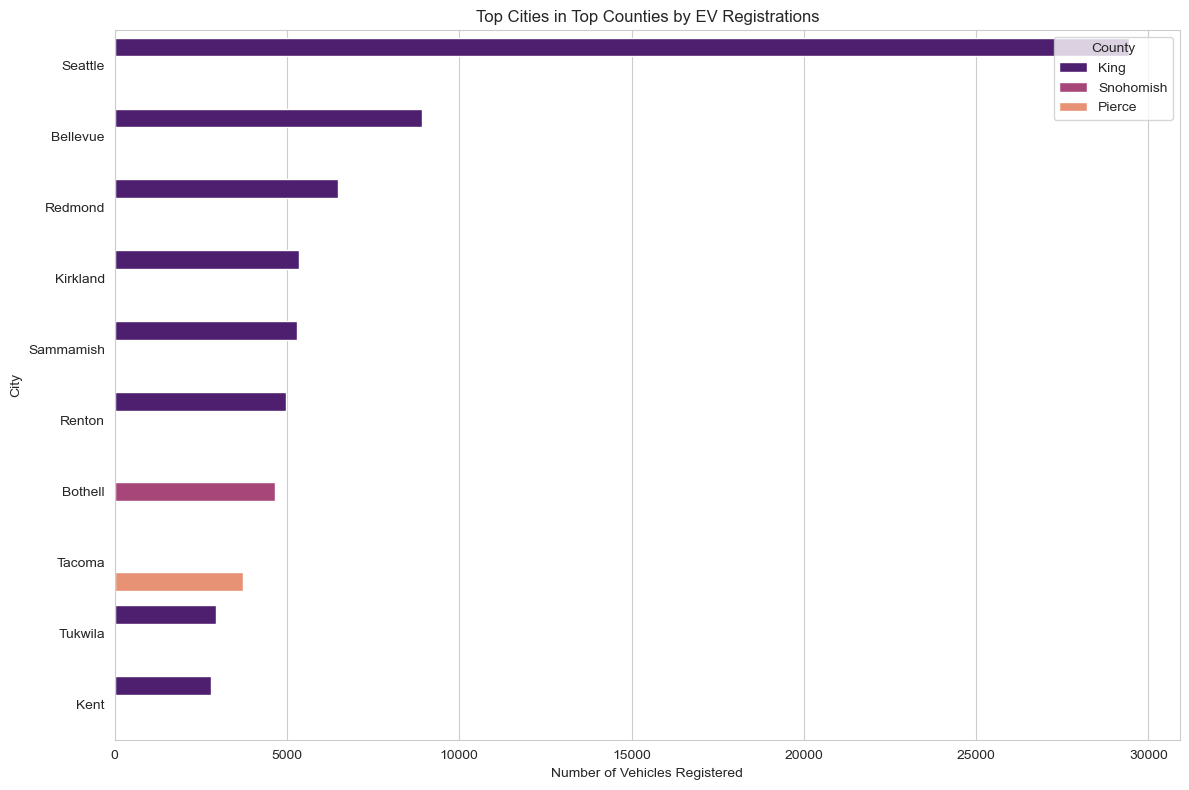

In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

# let’s visualize the distribution of electric vehicle types to see which categories are most popular among the registered vehicles:

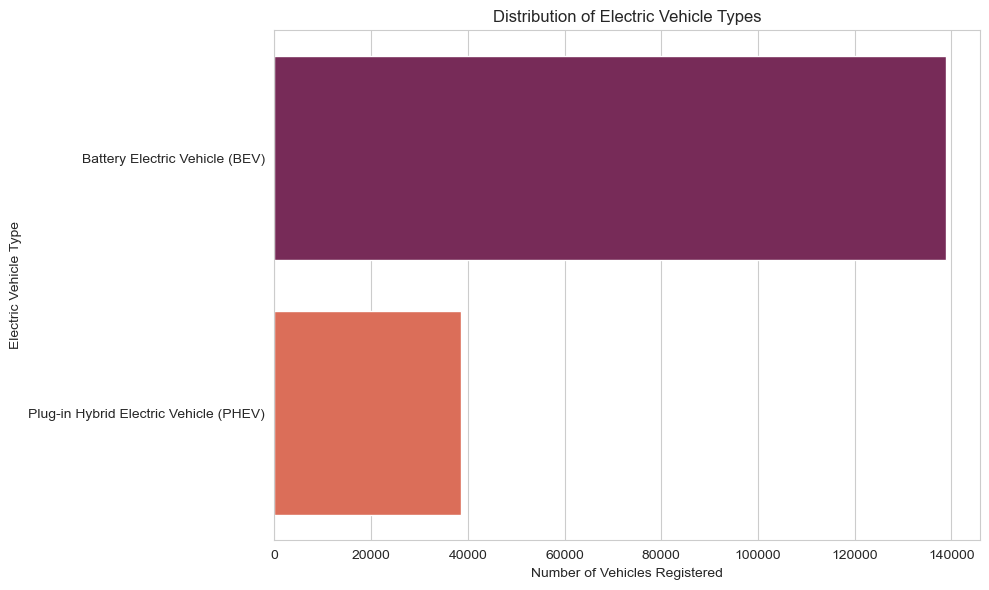

In [19]:
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

# let’s have a look at the most popular manufacturers and then drill down into the most popular models within those manufacturers:

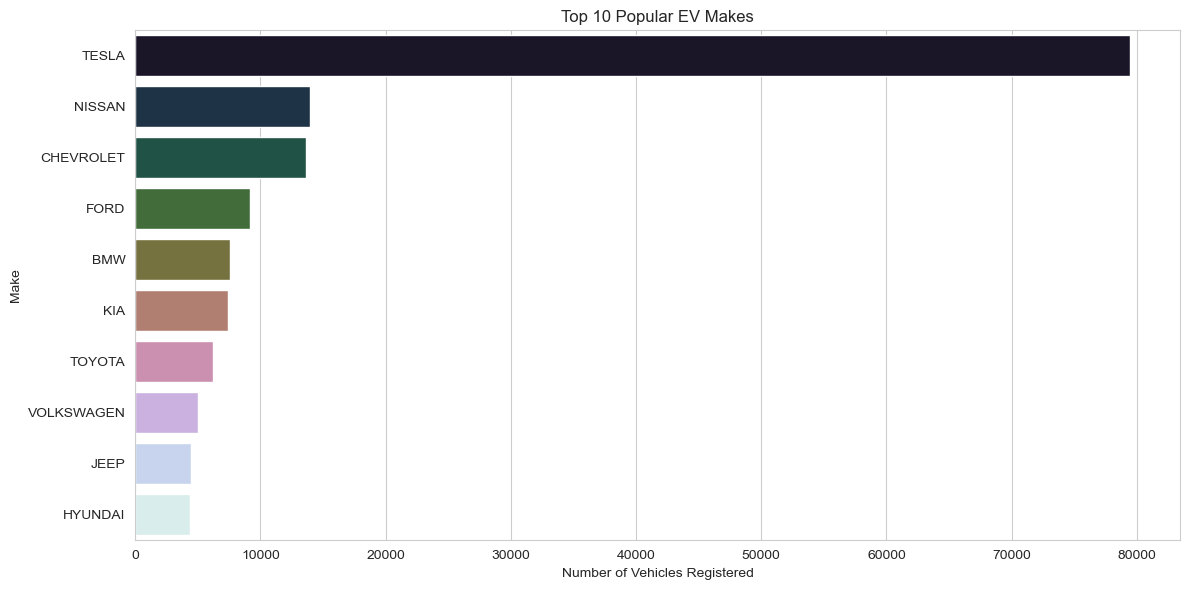

In [20]:
ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

# let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level:

In [21]:
top_3_makes = ev_make_distribution.head(3).index


In [22]:
top_3_makes

Index(['TESLA', 'NISSAN', 'CHEVROLET'], dtype='object')

In [23]:
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]
top_makes_data

VIN (1-10)     County         City State  Postal Code  Model Year  \
0       5YJYGDEE1L       King      Seattle    WA      98122.0        2020   
1       7SAYGDEE9P  Snohomish      Bothell    WA      98021.0        2023   
2       5YJSA1E4XK       King      Seattle    WA      98109.0        2019   
3       5YJSA1E27G       King     Issaquah    WA      98027.0        2016   
4       5YJYGDEE5M     Kitsap    Suquamish    WA      98392.0        2021   
...            ...        ...          ...   ...          ...         ...   
177859  1N4BZ1DV7M       King      Redmond    WA      98053.0        2021   
177860  1G1FX6S00J    Clallam       Sequim    WA      98382.0        2018   
177861  7SAYGDEE3N     Pierce  Bonney Lake    WA      98391.0        2022   
177863  5YJYGDEE6M      Grant       Quincy    WA      98848.0        2021   
177865  5YJ3E1EA8M     Pierce       Tacoma    WA      98422.0        2021   

             Make    Model           Electric Vehicle Type  \
0           TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
1           TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
2           TESLA  MODEL S  Battery Electric Vehicle (BEV)   
3           TESLA  MODEL S  Battery Electric Vehicle (BEV)   
4           TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
...           ...      ...                             ...   
177859     NISSAN     LEAF  Battery Electric Vehicle (BEV)   
177860  CHEVROLET  BOLT EV  Battery Electric Vehicle (BEV)   
177861      TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
177863      TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
177865      TESLA  MODEL 3  Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible             291   
1       Eligibility unknown as battery range has not b...               0   
2                 Clean Alternative Fuel Vehicle Eligible             270   
3                 Clean Alternative Fuel Vehicle Eligible             210   
4       Eligibility unknown as battery range has not b...               0   
...                                                   ...             ...   
177859  Eligibility unknown as battery range has not b...               0   
177860            Clean Alternative Fuel Vehicle Eligible             238   
177861  Eligibility unknown as battery range has not b...               0   
177863  Eligibility unknown as battery range has not b...               0   
177865  Eligibility unknown as battery range has not b...               0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                  37.0       125701579   
1               0                   1.0       244285107   
2               0                  36.0       156773144   
3               0                   5.0       165103011   
4               0                  23.0       205138552   
...           ...                   ...             ...   
177859          0                  45.0       172798951   
177860          0                  24.0       347972607   
177861          0                  31.0       195224452   
177863          0                  13.0       168797219   
177865          0                  27.0       211464683   

                       Vehicle Location  \
0          POINT (-122.30839 47.610365)   
1         POINT (-122.179458 47.802589)   
2          POINT (-122.34848 47.632405)   
3          POINT (-122.03646 47.534065)   
4          POINT (-122.55717 47.733415)   
...                                 ...   
177859  POINT (-122.0222799 47.6958998)   
177860     POINT (-123.105015 48.08125)   
177861     POINT (-122.183805 47.18062)   
177863  POINT (-119.8493873 47.2339933)   
177865      POINT (-122.38578 47.28971)   

                                         Electric Utility  2020 Census Tract  
0            CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10  
1                            

In [25]:
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
ev_model_distribution_top_makes

Make         Model  Number of Vehicles
0       TESLA       MODEL Y               35921
1       TESLA       MODEL 3               30009
2      NISSAN          LEAF               13352
3       TESLA       MODEL S                7711
4   CHEVROLET       BOLT EV                6811
5       TESLA       MODEL X                5784
6   CHEVROLET          VOLT                4782
7   CHEVROLET      BOLT EUV                1770
8      NISSAN         ARIYA                 632
9   CHEVROLET         SPARK                 240
10      TESLA      ROADSTER                  46
11  CHEVROLET  SILVERADO EV                  33
12  CHEVROLET     BLAZER EV                  14
13  CHEVROLET   S-10 PICKUP                   1

In [26]:
top_models = ev_model_distribution_top_makes.head(10)
top_models

Make     Model  Number of Vehicles
0      TESLA   MODEL Y               35921
1      TESLA   MODEL 3               30009
2     NISSAN      LEAF               13352
3      TESLA   MODEL S                7711
4  CHEVROLET   BOLT EV                6811
5      TESLA   MODEL X                5784
6  CHEVROLET      VOLT                4782
7  CHEVROLET  BOLT EUV                1770
8     NISSAN     ARIYA                 632
9  CHEVROLET     SPARK                 240

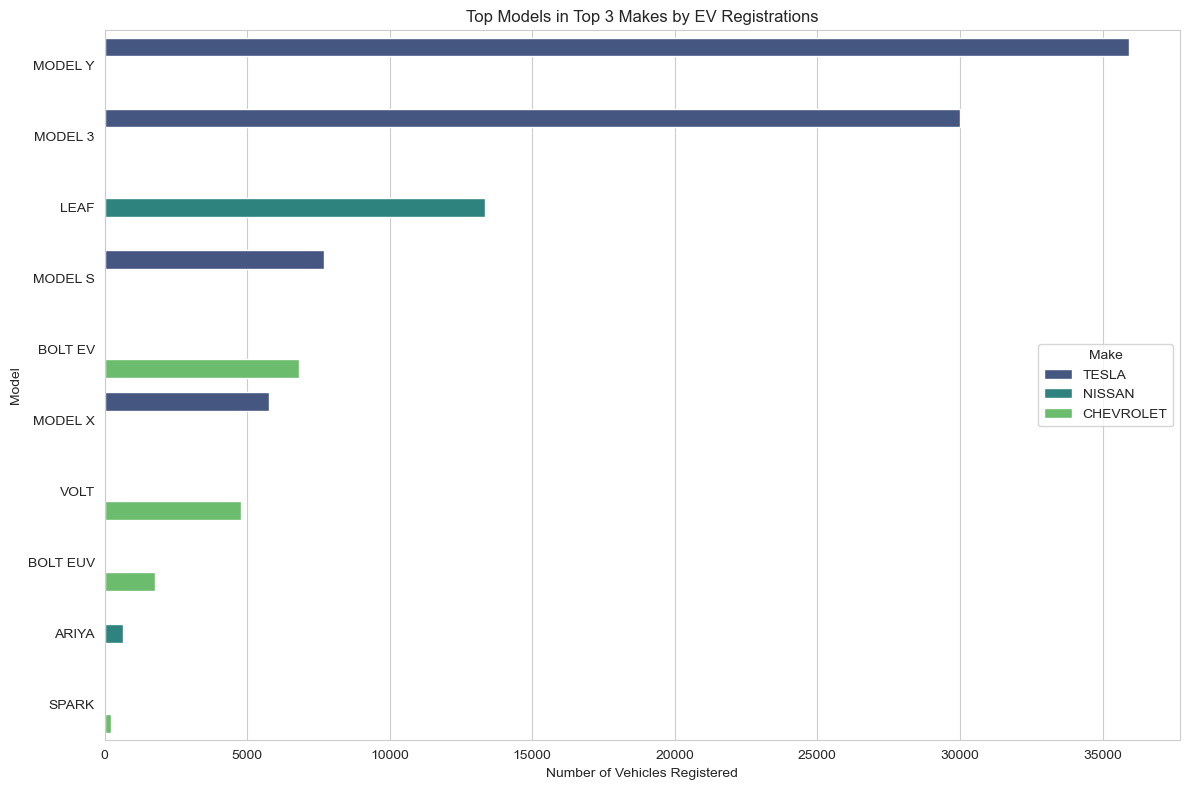

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

# let’s look at the distribution of electric ranges in the dataset and identify any notable trends, such as improvements over time or variations between different vehicle types or manufacturers:

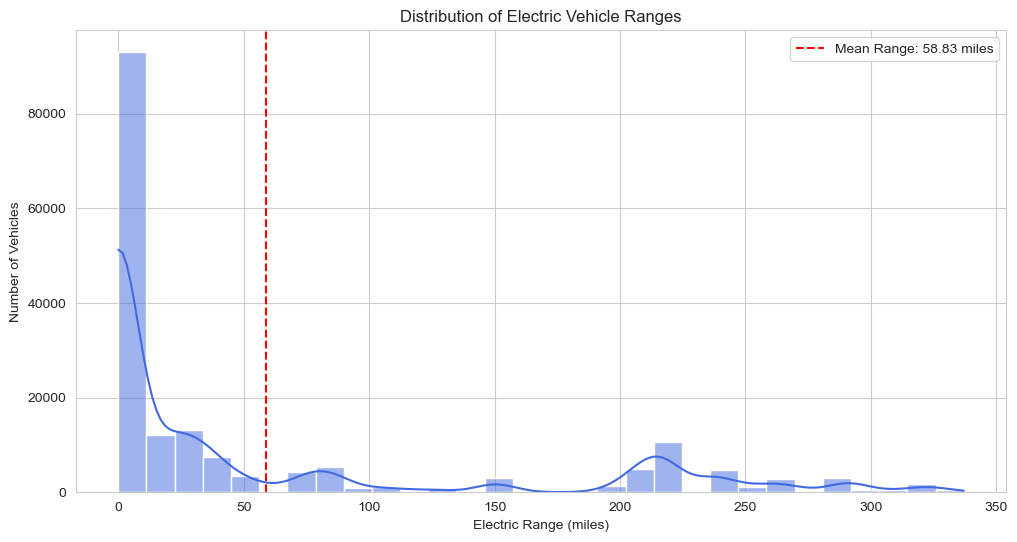

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

# calculating the average electric range by model year


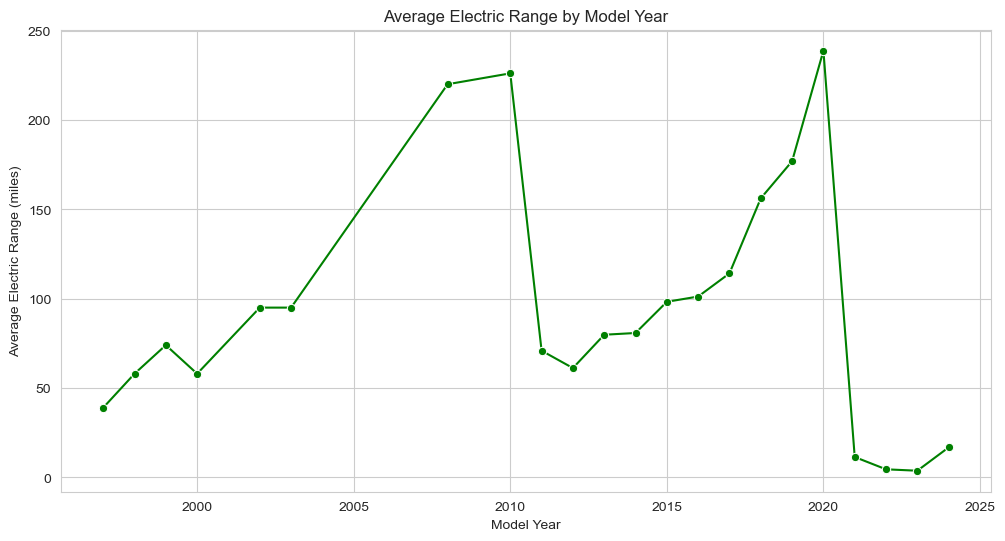

In [29]:
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

In [30]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)



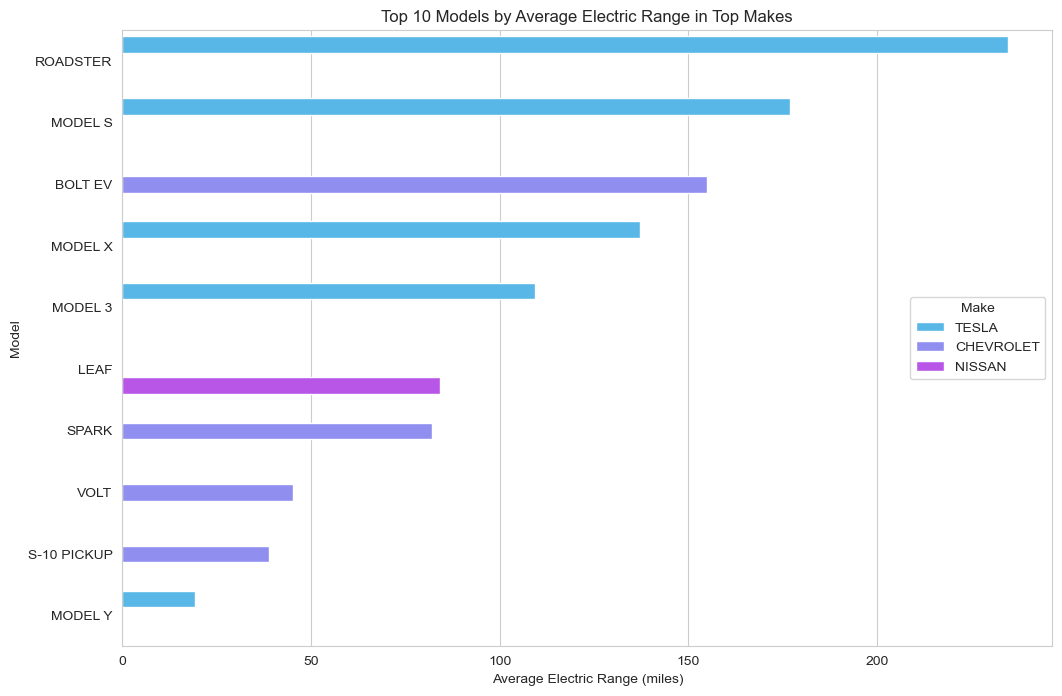

In [31]:
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

In [32]:
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: Model Year, dtype: int64

In [33]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


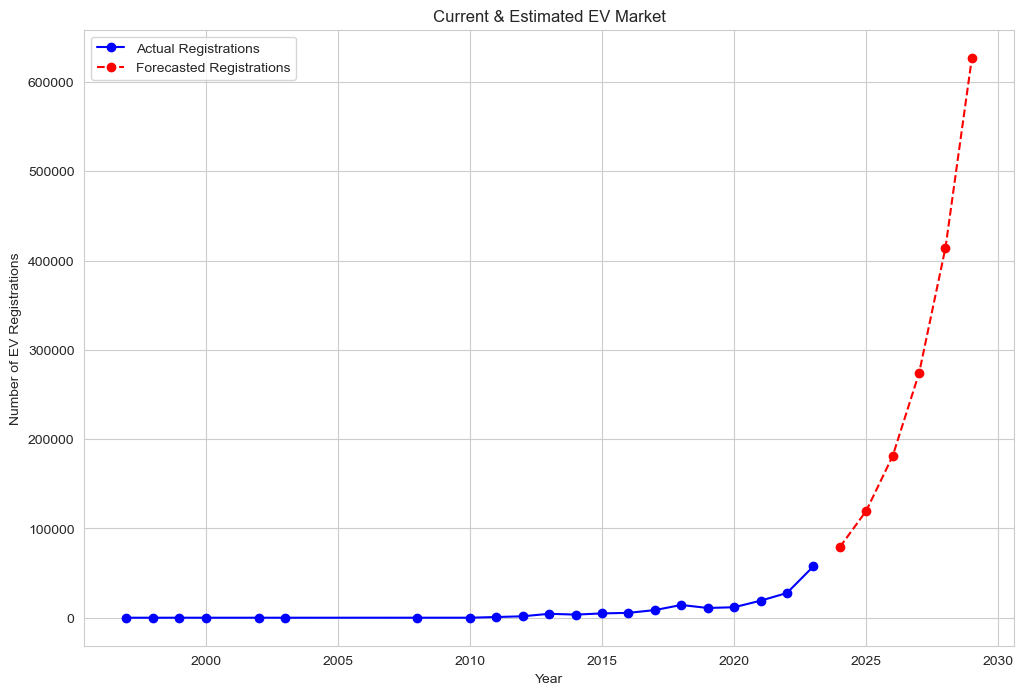

In [34]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

# Summary :
# Market size analysis is crucial for understanding demand, market saturation, and growth opportunities. In the electric vehicle industry, a shift in consumer preferences indicates a promising future, with potential for increased investment and business opportunities due to the market size analysis.